In [96]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
!pip install pyEDM
import pyEDM as edm

In [80]:
'''
Binary prediction skill (“bloom” or “no bloom”) is
evaluated by how well bloom predictions (5% largest predicted values)
correspond to bloom observations (5%largest observed values)
Input: Series of observed chlorophyll-a, series of predicted chlorophyll-1
Output: Arrray containing [Accuracy, True Positive Rate, False Positive Rate, True Negative Rate, False Negative Rate]
'''
def bloom_binary_prediction(obs,pred):
    obs_bloom_95 = np.percentile(obs, 95)
    pred_bloom_95 = np.percentile(pred, 95)
    obs_blooms = obs > obs_bloom_95
    pred_blooms = pred > pred_bloom_95
    Accuracy = 1 - (obs_blooms ^ pred_blooms).mean()
    True_pos = (obs_blooms & pred_blooms).sum() / obs_blooms.sum()
    False_pos = ((~obs_blooms) & pred_blooms).sum() / (~obs_blooms).sum()
    True_neg = ((~obs_blooms) & (~pred_blooms)).sum() / (~obs_blooms).sum()
    False_neg = (obs_blooms & (~pred_blooms)).sum() / obs_blooms.sum()
    
    return [Accuracy, True_pos, False_pos, True_neg, False_neg]

In [81]:
paper_data = pd.read_csv('Data/cleaned_data.csv')
paper_data['Time'] = paper_data.index
print(paper_data)

     time (UTC)  Avg_Chloro  Nitrate  Phosphate  Silicate  Nitrite  \
0           NaN        1.82     0.43       0.24       5.6     0.03   
1           NaN        2.71     0.83       0.37       5.1     0.04   
2           NaN        0.99     0.45       0.24       3.5     0.00   
3           NaN        1.23     0.34       0.17       4.2     0.00   
4           NaN        2.41     0.29       0.12       3.8     0.00   
..          ...         ...      ...        ...       ...      ...   
827         NaN        3.22     0.85       0.30       6.2     0.00   
828         NaN        3.39     0.45       0.25       4.9     0.00   
829         NaN        7.82     0.00       0.17       5.2     0.00   
830         NaN       17.30     0.00       0.20       9.4     0.00   
831         NaN       16.71     0.00       0.10       7.5     0.00   

     SURF_TEMP_C  BOT_TEMP_C  SURF_SAL_PSU  BOT_SAL_PSU  SURF_DENS_kgm3  \
0           20.3        15.9         33.77        33.62     1023.638094   
1        

In [82]:
time_series = paper_data[['Time', 'Nitrate', 'Phosphate', 'Silicate',  'Nitrite', 'AVG_TEMP_C', 'AVG_SAL_PSU', 'AVG_DENS_kgm3', 'Avg_Chloro']]
print(time_series)

     Time  Nitrate  Phosphate  Silicate  Nitrite  AVG_TEMP_C  AVG_SAL_PSU  \
0       0     0.43       0.24       5.6     0.03       18.10       33.695   
1       1     0.83       0.37       5.1     0.04       17.35       33.640   
2       2     0.45       0.24       3.5     0.00       20.25       33.660   
3       3     0.34       0.17       4.2     0.00        9.90       33.650   
4       4     0.29       0.12       3.8     0.00       11.25       33.710   
..    ...      ...        ...       ...      ...         ...          ...   
827   827     0.85       0.30       6.2     0.00       17.40       33.470   
828   828     0.45       0.25       4.9     0.00       17.90       33.475   
829   829     0.00       0.17       5.2     0.00       17.35       33.545   
830   830     0.00       0.20       9.4     0.00       17.70       33.625   
831   831     0.00       0.10       7.5     0.00       17.80       33.625   

     AVG_DENS_kgm3  Avg_Chloro  
0      1024.129374        1.82  
1      10

In [124]:
embedded = edm.Embed(
    dataFrame = time_series, 
    columns = 'Nitrate Phosphate Silicate Nitrite AVG_TEMP_C AVG_SAL_PSU AVG_DENS_kgm3 Avg_Chloro',
    E = 3,
    tau=-1
)
embedded

,Nitrate(t-0),Phosphate(t-0),Silicate(t-0),Nitrite(t-0),AVG_TEMP_C(t-0),AVG_SAL_PSU(t-0),AVG_DENS_kgm3(t-0),Avg_Chloro(t-0),Nitrate(t-1),Phosphate(t-1),...,AVG_DENS_kgm3(t-1),Avg_Chloro(t-1),Nitrate(t-2),Phosphate(t-2),Silicate(t-2),Nitrite(t-2),AVG_TEMP_C(t-2),AVG_SAL_PSU(t-2),AVG_DENS_kgm3(t-2),Avg_Chloro(t-2)
0,0.43,0.24,5.6,0.03,18.10,33.695,1024.129374,1.82,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.83,0.37,5.1,0.04,17.35,33.640,1024.289049,2.71,0.43,0.24,...,1024.129374,1.82,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.45,0.24,3.5,0.00,20.25,33.660,1023.563298,0.99,0.83,0.37,...,1024.289049,2.71,0.43,0.24,5.6,0.03,18.10,33.695,1024.129374,1.82
3,0.34,0.17,4.2,0.00,9.90,33.650,1023.740812,1.23,0.45,0.24,...,1023.563298,0.99,0.83,0.37,5.1,0.04,17.35,33.640,1024.289049,2.71
4,0.29,0.12,3.8,0.00,11.25,33.710,1023.004896,2.41,0.34,0.17,...,1023.740812,1.23,0.45,0.24,3.5,0.00,20.25,33.660,1023.563298,0.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
827,0.85,0.30,6.2,0.00,17.40,33.470,1024.149572,3.22,0.99,0.22,...,1023.990298,4.03,1.00,0.28,6.3,0.00,16.85,33.330,1024.172867,4.10
828,0.45,0.25,4.9,0.00,17.90,33.475,1024.033476,3.39,0.85,0.30,...,1024.149572,3.22,0.99,0.22,8.1,0.00,17.75,33.370,1023.990298,4.03
829,0.00,0.17,5.2,0.00,17.35,33.545,1024.214172,7.82,0.45,0.25,...,1024.033476,3.39,0.85,0.30,6.2,0.00,17.40,33.470,1024.149572,3.22
830,0.00,0.20,9.4,0.00,17.70,33.625,1024.194573,17.30,0.00,0.17,...,1024.214172,7.82,0.45,0.25,4.9,0.00,17.90,33.475,1024.033476,3.39


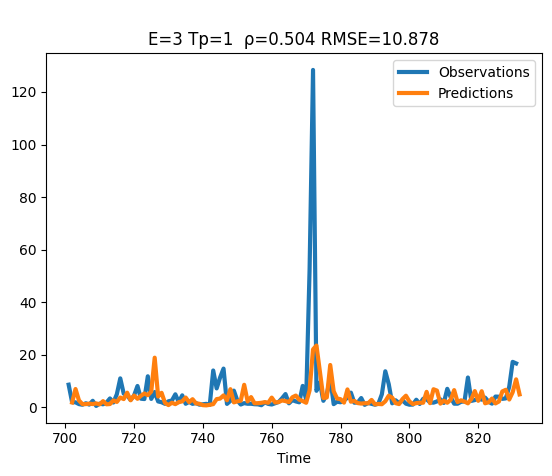

      Time  Observations  Predictions  Pred_Variance
0    701.0          8.61          NaN            NaN
1    702.0          1.97     1.834100       0.267110
2    703.0          1.90     6.964844      37.903739
3    704.0          1.22     2.599253       2.588172
4    705.0          0.98     1.218376       0.123333
..     ...           ...          ...            ...
127  828.0          3.39     6.658429      35.765845
128  829.0          7.82     2.965545       3.115841
129  830.0         17.30     5.734473       5.471602
130  831.0         16.71    10.647297      43.317119
131  832.0           NaN     4.918202       8.396710

[132 rows x 4 columns]


In [83]:
result = edm.Simplex(
    dataFrame = time_series, 
    columns = 'Nitrate Phosphate Silicate Nitrite AVG_TEMP_C AVG_SAL_PSU AVG_DENS_kgm3 Avg_Chloro',
    target = 'Avg_Chloro',
    lib = '1 701',  # Library from rows 0 to 700
    pred = '702 832',
    E = 3,
    showPlot = True
)
print(result)

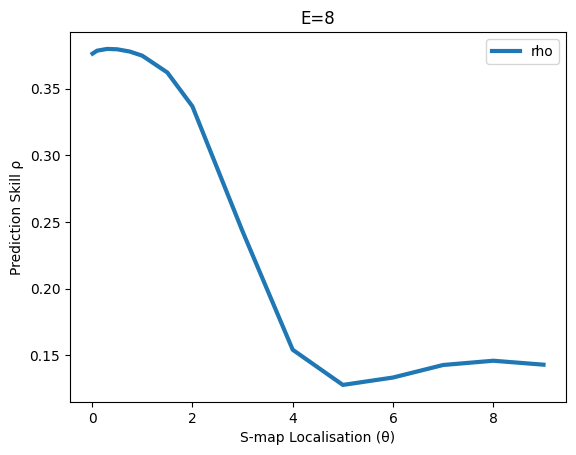

,theta,rho
0,0.01,0.376319
1,0.10,0.378522
2,0.30,0.379841
3,0.50,0.379567
4,0.75,0.377887
5,1.00,0.374774
6,1.50,0.362168
7,2.00,0.336801
8,3.00,0.243017
9,4.00,0.154194


In [84]:
edm.PredictNonlinear( dataFrame = time_series, lib = '1 701', pred = '702 832',
                  columns = 'Nitrate Phosphate Silicate Nitrite AVG_TEMP_C AVG_SAL_PSU AVG_DENS_kgm3 Avg_Chloro', target = 'Avg_Chloro', E = 3, embedded=True )

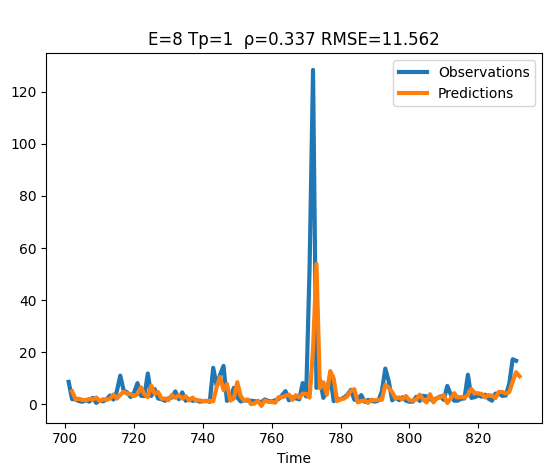

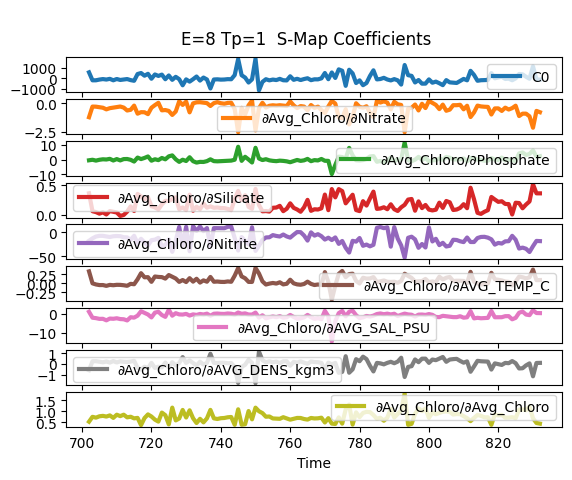

{'predictions':       Time  Observations  Predictions  Pred_Variance
0    701.0          8.61          NaN            NaN
1    702.0          1.97     4.987491      24.022696
2    703.0          1.90     1.999725       6.624666
3    704.0          1.22     2.082001       6.100071
4    705.0          0.98     1.688024       5.623911
..     ...           ...          ...            ...
127  828.0          3.39     4.141389      18.634498
128  829.0          7.82     4.650065      20.240295
129  830.0         17.30     8.659320      57.717718
130  831.0         16.71    12.312871     107.476513
131  832.0           NaN    10.752388      80.430644

[132 rows x 4 columns], 'coefficients':       Time           C0  ∂Avg_Chloro/∂Nitrate  ∂Avg_Chloro/∂Phosphate  \
0    701.0          NaN                   NaN                     NaN   
1    702.0   556.260294             -1.208234               -0.521366   
2    703.0  -184.440551             -0.275993               -0.167429   
3    704.0  -18

Time              814.000000
Nitrate             0.780000
Phosphate           0.290000
Silicate            2.400000
Nitrite             0.000000
AVG_TEMP_C         15.650000
AVG_SAL_PSU        33.015000
AVG_DENS_kgm3    1024.204592
Avg_Chloro          1.370000
Name: 814, dtype: float64

In [131]:
#Using embeddings 
'''
result = edm.SMap(
    dataFrame = embedded, 
    columns = 'Nitrate(t-0) Phosphate(t-0) Silicate(t-0) Nitrite(t-0) AVG_TEMP_C(t-0) AVG_SAL_PSU(t-0) AVG_DENS_kgm3(t-0) Avg_Chloro(t-0)',
    target = 'Avg_Chloro(t-0)',
    lib = '1 701',  # Library from rows 0 to 700
    pred = '702 832',
    E = 8,
    theta=2,
    showPlot = True,
    embedded=True,
    ignoreNan = True
)
print(result)
time_series.iloc[814]
'''


result = edm.SMap(
    dataFrame = time_series, 
    columns = 'Nitrate Phosphate Silicate Nitrite AVG_TEMP_C AVG_SAL_PSU AVG_DENS_kgm3 Avg_Chloro',
    target = 'Avg_Chloro',
    lib = '1 701',  # Library from rows 0 to 700
    pred = '702 832',
    E = 7,
    theta=2,
    showPlot = True,
    embedded=True,
    ignoreNan = True
)
print(result)
time_series.iloc[814]

In [126]:
result['predictions']


,Time,Observations,Predictions,Pred_Variance
0,1.10,8.61,NaN,NaN
1,1.13,1.97,4.987491,24.022696
2,1.27,1.90,1.999725,6.624666
3,0.94,1.22,2.082001,6.100071
4,0.79,0.98,1.688024,5.623911
...,...,...,...,...
127,0.45,3.39,4.141389,18.634498
128,0.00,7.82,4.650065,20.240295
129,0.00,17.30,8.659320,57.717718
130,0.00,16.71,12.312871,107.476513


In [129]:
bloom_binary_prediction(result['predictions']['Observations'].iloc[1:-1],result['predictions']['Predictions'].iloc[1:-1])


[0.9384615384615385,
 0.42857142857142855,
 0.032520325203252036,
 0.967479674796748,
 0.5714285714285714]

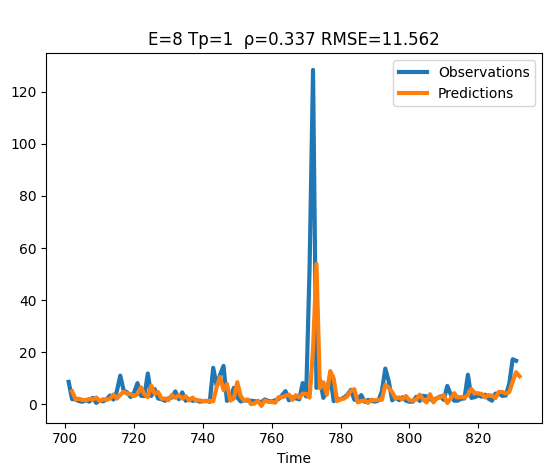

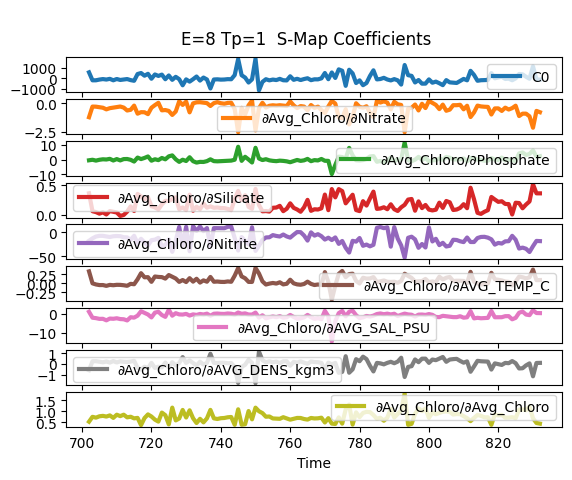

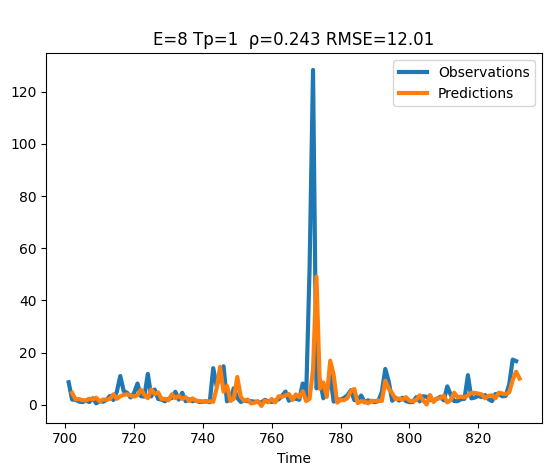

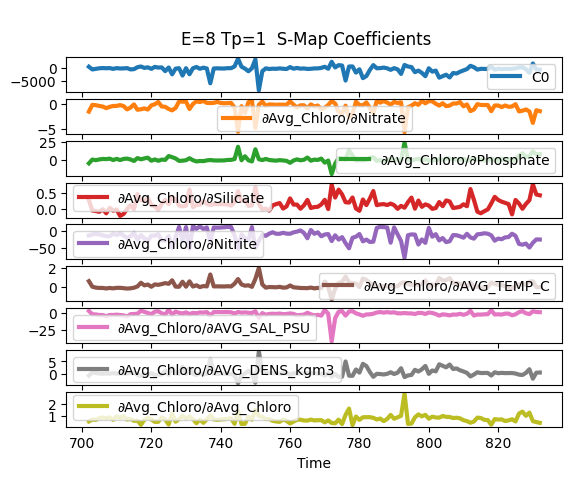

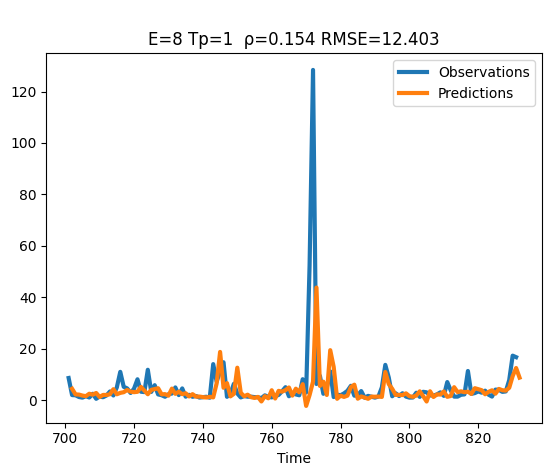

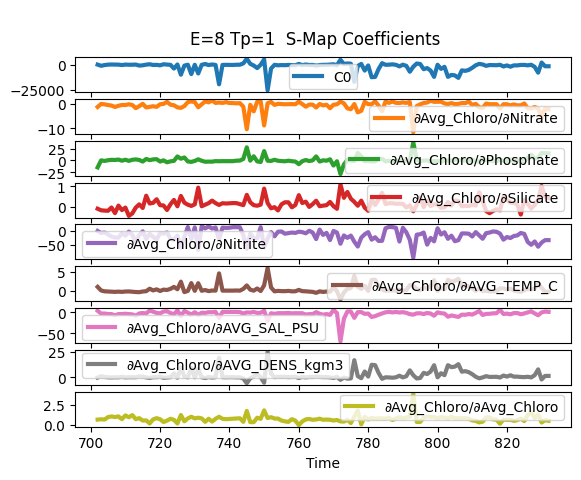

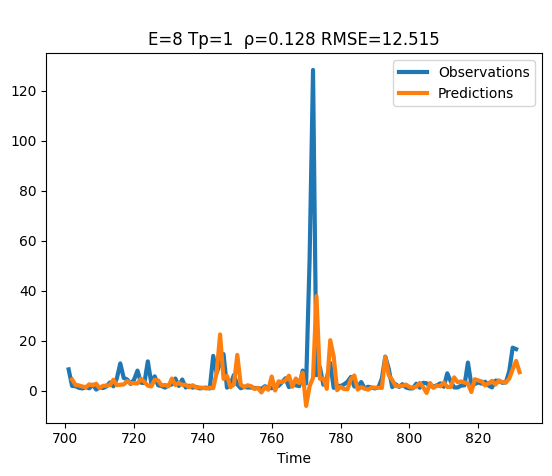

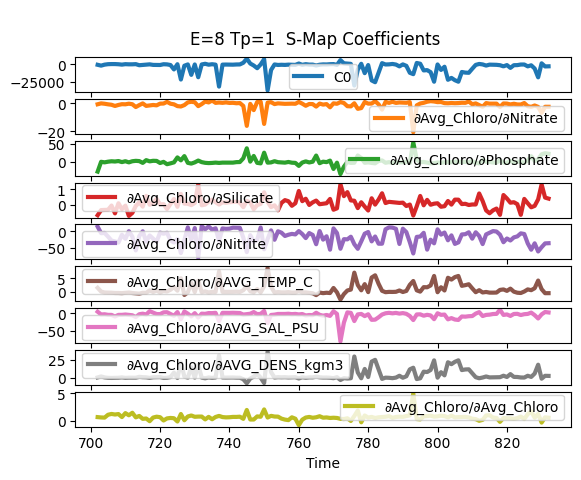

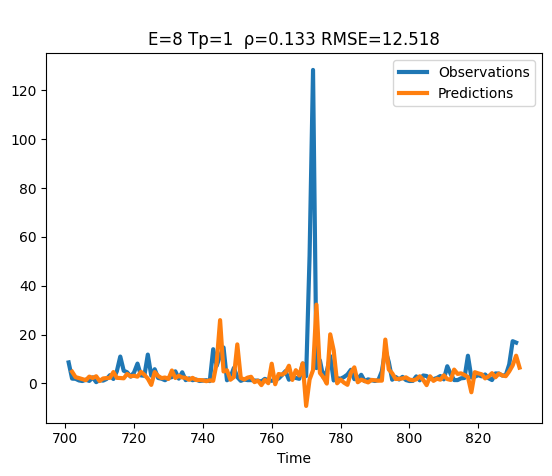

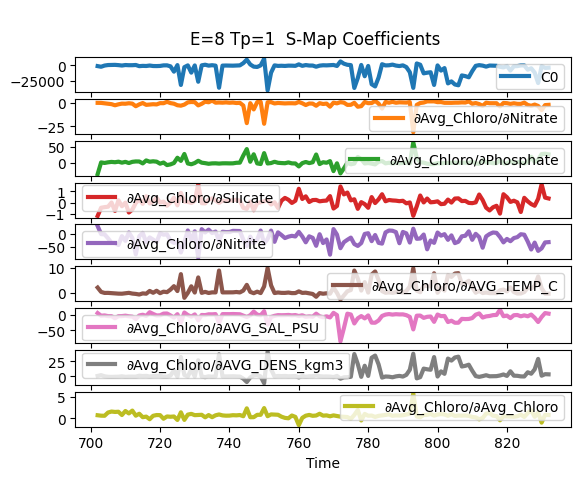

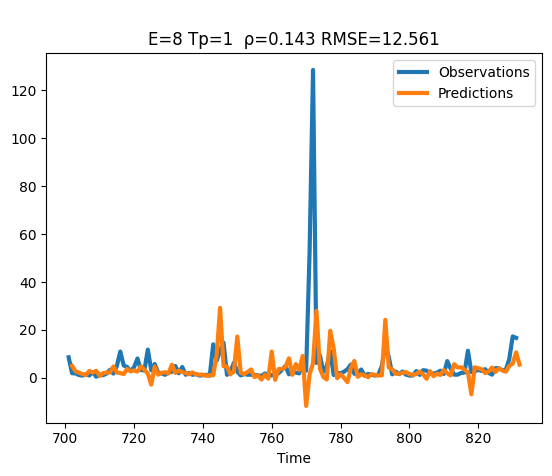

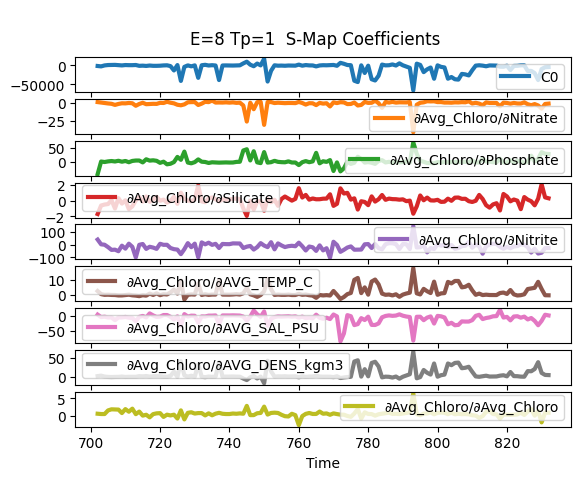

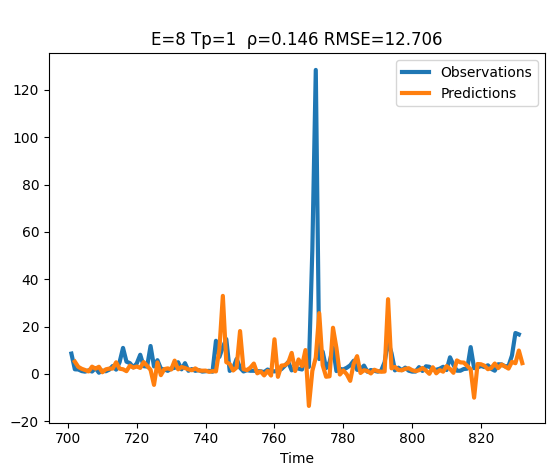

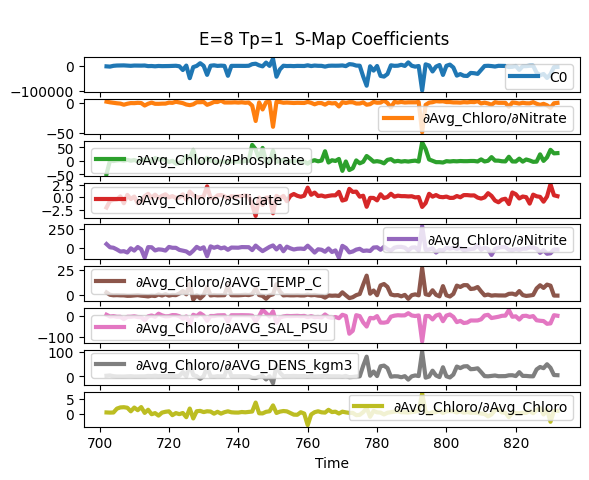

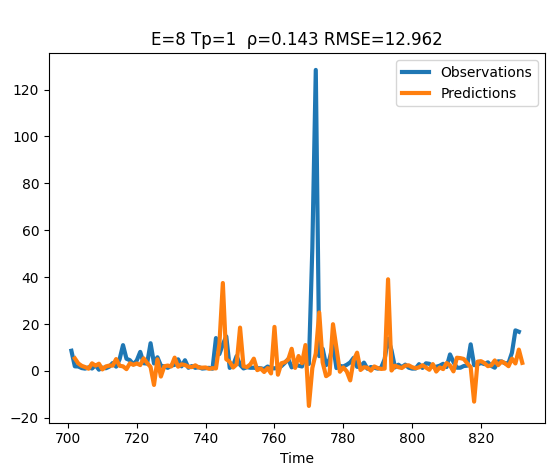

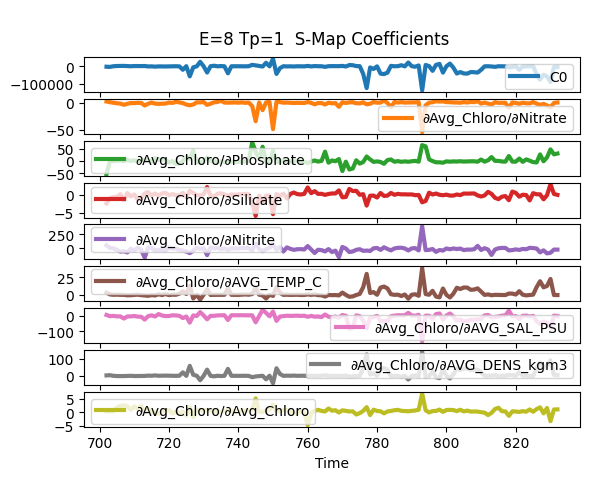

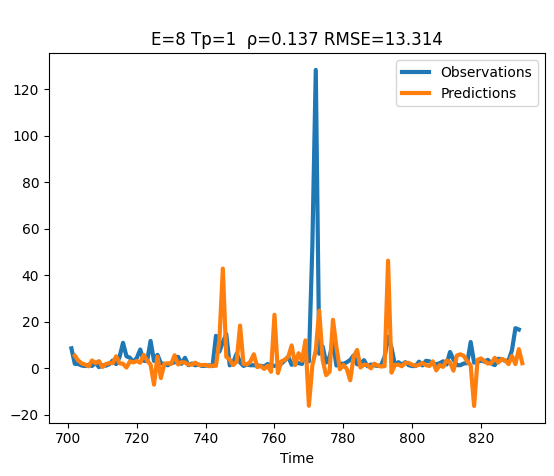

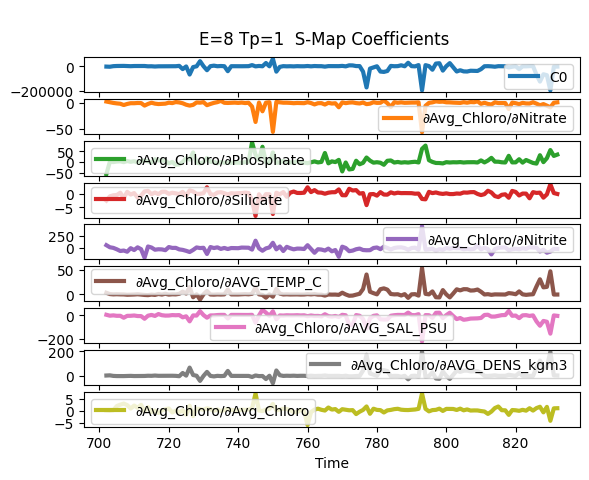

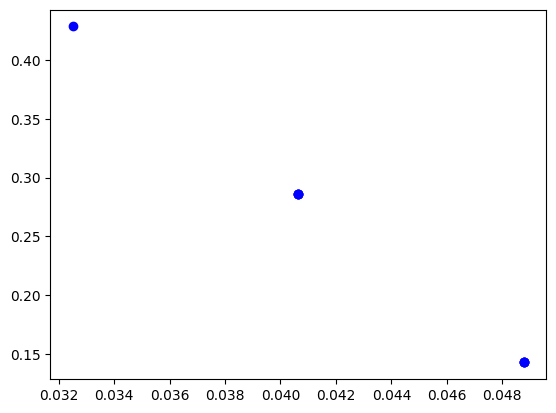

In [113]:
#Larger trial with different embeddings 
x = []
y = []
for i in range(2,11):
    result = edm.SMap(
    dataFrame = time_series, 
    columns = 'Nitrate Phosphate Silicate Nitrite AVG_TEMP_C AVG_SAL_PSU AVG_DENS_kgm3 Avg_Chloro',
    target = 'Avg_Chloro',
    lib = '1 701',  # Library from rows 0 to 700
    pred = '702 832',
    E = i,
    theta=i,
    showPlot = True,
    embedded=True,
    ignoreNan = True
    )   
    cur_bloom = bloom_binary_prediction(result['predictions']['Observations'].iloc[1:-1],result['predictions']['Predictions'].iloc[1:-1])
    x.append(cur_bloom[2]) #False positive
    y.append(cur_bloom[1]) #True positive

plt.scatter(x, y, color='blue', label='Data Points')

In [88]:
result['predictions']['Observations'].iloc[1:]

1       1.97
2       1.90
3       1.22
4       0.98
5       1.54
       ...  
127     3.39
128     7.82
129    17.30
130    16.71
131      NaN
Name: Observations, Length: 131, dtype: float64